In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
data = pd.read_csv('../data/heart_disease_scaled.csv')
X = data.drop('target',axis=1)
Y = data['target']

### Univariate Selection (Chi2)

In [19]:
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X, Y)
chi2_features = X.columns[chi2_selector.get_support()].tolist()
print("📊 Chi2 Top 10 Features:", chi2_features)

📊 Chi2 Top 10 Features: ['sex', 'exang', 'oldpeak', 'ca', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_2.0', 'slope_2.0', 'thal_7.0']


### Feature Importance from Random Forest

In [22]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, Y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
rf_features = importances.sort_values(ascending=False).head(10).index.tolist()
print("🌲 Random Forest Top 10 Features:", rf_features)

🌲 Random Forest Top 10 Features: ['ca', 'thalach', 'oldpeak', 'cp_4.0', 'thal_7.0', 'age', 'chol', 'trestbps', 'exang', 'slope_2.0']


### RFE (Recursive Feature Elimination)

In [24]:
lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=10)
rfe.fit(X, Y)
rfe_features = X.columns[rfe.support_].tolist()
print("🔁 RFE Top 10 Features:", rfe_features)

🔁 RFE Top 10 Features: ['sex', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_4.0', 'slope_2.0', 'thal_7.0']


### Combine

In [25]:
top_features = list(set(chi2_features + rf_features + rfe_features))
print("\n🧩 Final selected features (Union):", top_features)


🧩 Final selected features (Union): ['restecg_2.0', 'slope_2.0', 'cp_3.0', 'age', 'sex', 'thal_7.0', 'oldpeak', 'chol', 'cp_2.0', 'cp_4.0', 'exang', 'ca', 'trestbps', 'thalach']


In [27]:
data_selected = data[top_features + ["target"]]
data_selected.to_csv("../data/heart_disease_selected.csv", index=False)
print("\n✅ Saved reduced dataset with selected features: heart_disease_selected.csv")


✅ Saved reduced dataset with selected features: heart_disease_selected.csv


/tmp/ipykernel_66545/1644851612.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_union_importances, y=rf_union_importances.index, palette="mako")
/tmp/ipykernel_66545/1644851612.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/mohammed/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


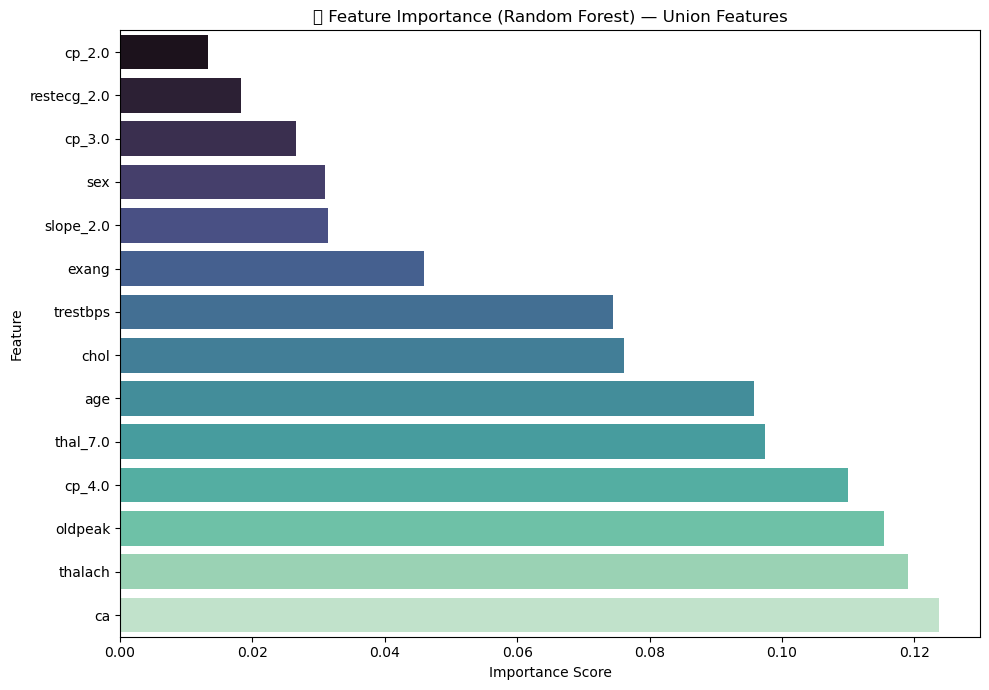

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

rf_union_importances = importances[top_features].sort_values(ascending=True)

plt.figure(figsize=(10, 7))
sns.barplot(x=rf_union_importances, y=rf_union_importances.index, palette="mako")
plt.title("📊 Feature Importance (Random Forest) — Union Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()